In [1]:
import os
import glob
from pathlib import Path
import shutil

from ultralytics import YOLO
from ultralytics.models.yolo.detect import DetectionTrainer
from ultralytics.nn.tasks import DetectionModel

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import glob
import os

from helper import *

import cv2 as cv

In [2]:
folder_path = 'datasets'

original_train_path = folder_path + '/train'
original_train_penguin_path = original_train_path + '/penguin'
original_train_turtle_path = original_train_path + '/turtle'

train_path = folder_path + '/train_yolo'
val_path = folder_path + '/val'
test_path = folder_path + '/test'

ann_train_path = folder_path + '/train_label'
ann_val_path = folder_path + '/val_label'
ann_test_path = folder_path + '/test_label'

train_ann_path = folder_path +  '/train_annotations'
val_ann_path = folder_path +  '/valid_annotations'
test_ann_path = folder_path +  '/test_annotations'

In [3]:
# Remove all YOLO training files
if Path(train_path).is_dir():
    shutil.rmtree(train_path)

# Re-create YOLO training files by copying from training folder penguin and turtle and putting them in one folder
os.mkdir(train_path)
train_images = glob.glob(original_train_penguin_path + '/image_id_*.jpg') + glob.glob(original_train_turtle_path + '/image_id_*.jpg')
for image in train_images:
    shutil.copy2(image, train_path)

In [4]:
# Pascal VOC format
train_annotations = pd.read_json(train_ann_path)
val_annotations = pd.read_json(val_ann_path)
test_annotations = pd.read_json(test_ann_path)

# Apply some annotation update
test_annotations = test_annotations.drop(['id'], axis=1)
test_annotations['category_id'] = test_annotations['category_id'].apply(update_category)    

# Generate annotations for images
gen_ann_yolo_txt(val_path, ann_val_path, val_annotations)
gen_ann_yolo_txt(train_path, ann_train_path, train_annotations)
gen_ann_yolo_txt(test_path, ann_test_path, test_annotations)

In [5]:
model = YOLO('yolov8n.pt')
for k, v in model.model.named_parameters():
    print(k)

model.0.conv.weight
model.0.bn.weight
model.0.bn.bias
model.1.conv.weight
model.1.bn.weight
model.1.bn.bias
model.2.cv1.conv.weight
model.2.cv1.bn.weight
model.2.cv1.bn.bias
model.2.cv2.conv.weight
model.2.cv2.bn.weight
model.2.cv2.bn.bias
model.2.m.0.cv1.conv.weight
model.2.m.0.cv1.bn.weight
model.2.m.0.cv1.bn.bias
model.2.m.0.cv2.conv.weight
model.2.m.0.cv2.bn.weight
model.2.m.0.cv2.bn.bias
model.3.conv.weight
model.3.bn.weight
model.3.bn.bias
model.4.cv1.conv.weight
model.4.cv1.bn.weight
model.4.cv1.bn.bias
model.4.cv2.conv.weight
model.4.cv2.bn.weight
model.4.cv2.bn.bias
model.4.m.0.cv1.conv.weight
model.4.m.0.cv1.bn.weight
model.4.m.0.cv1.bn.bias
model.4.m.0.cv2.conv.weight
model.4.m.0.cv2.bn.weight
model.4.m.0.cv2.bn.bias
model.4.m.1.cv1.conv.weight
model.4.m.1.cv1.bn.weight
model.4.m.1.cv1.bn.bias
model.4.m.1.cv2.conv.weight
model.4.m.1.cv2.bn.weight
model.4.m.1.cv2.bn.bias
model.5.conv.weight
model.5.bn.weight
model.5.bn.bias
model.6.cv1.conv.weight
model.6.cv1.bn.weight
model.

In [6]:
# Freeze backbone
model.add_callback("on_train_start", freeze_layer)

# Start training
model.train(data="dataset.yaml", epochs=20, batch=8, device=0)

New https://pypi.org/project/ultralytics/8.0.147 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.141 🚀 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=20, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualiz

Freezing 10 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model

       1/20     0.665G      1.008      2.009      1.358          7        640: 100%|██████████| 563/563 [00:39<00:00, 14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00
                   all         50         50      0.697       0.73      0.769      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/20     0.644G      1.094       1.38      1.389          9        640: 100%|██████████| 563/563 [00:34<00:00, 16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00
                   all         50         50      0.834        0.9      0.927      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/20     0.644G      1.112        1.2      1.394         10        640: 100%|██████████| 563/563 [00:34<00:00, 16
                 Class     Images  Instances      Box(P    

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:02<00
                   all         50         50      0.974      0.881      0.972       0.82

20 epochs completed in 0.211 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.0.141 🚀 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00
                   all         50         50      0.974      0.881      0.972      0.819
               penguin         50         25      0.996       0.96      0.993      0.857
                turtle         50         25      0.952      0.801       0.95      0.781
Speed: 3.3ms 

In [7]:
# Export the model to ONNX format
success = model.export(format='onnx')

Ultralytics YOLOv8.0.141 🚀 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients

PyTorch: starting from 'runs/detect/train6/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

ONNX: starting export with onnx 1.14.0 opset 16...
ONNX: export success ✅ 0.6s, saved as 'runs/detect/train6/weights/best.onnx' (11.7 MB)

Export complete (0.8s)
Results saved to /home/duke/github/penguins-and-turtle-classifier/runs/detect/train6/weights
Predict:         yolo predict task=detect model=runs/detect/train6/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train6/weights/best.onnx imgsz=640 data=dataset.yaml 
Visualize:       https://netron.app


In [8]:
# Reload the model
model = YOLO(success)

In [9]:
%matplotlib inline

Loading runs/detect/train6/weights/best.onnx for ONNX Runtime inference...

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_000.jpg: 640x640 1 penguin, 33.0ms
Speed: 5.1ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_001.jpg: 640x640 1 turtle, 55.4ms
Speed: 1.4ms preprocess, 55.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_002.jpg: 640x640 1 turtle, 41.4ms
Speed: 1.0ms preprocess, 41.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_003.jpg: 640x640 1 penguin, 38.8ms
Speed: 1.1ms preprocess, 38.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/dataset


image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_038.jpg: 640x640 1 penguin, 40.2ms
Speed: 1.2ms preprocess, 40.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_039.jpg: 640x640 1 penguin, 1 turtle, 39.5ms
Speed: 4.6ms preprocess, 39.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_040.jpg: 640x640 1 turtle, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_041.jpg: 640x640 1 turtle, 42.2ms
Speed: 1.5ms preprocess, 42.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_042.jpg: 640x640 2 penguins, 41.9ms
Speed: 1.1ms 

Detection Performance mu: 8.435145003268795, std: 10.247437635722656
IOU mu: 0.9304618385211962, std: 0.06897423545580764


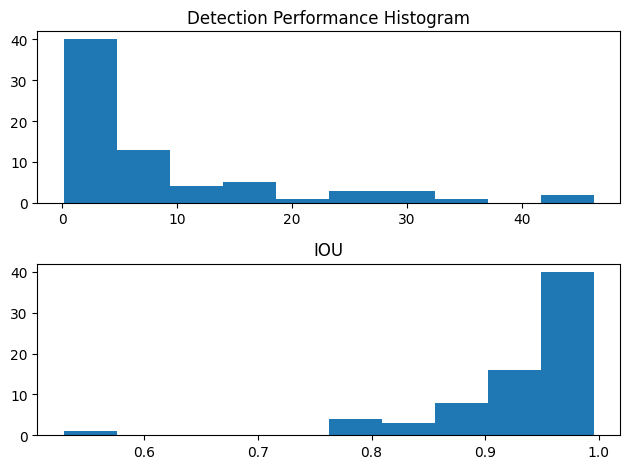

In [10]:
get_performance_yolo(model, test_annotations, test_path)


image 1/1 /home/duke/github/penguins-and-turtle-classifier/datasets/test/image_id_067.jpg: 640x640 1 turtle, 40.5ms
Speed: 1.3ms preprocess, 40.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


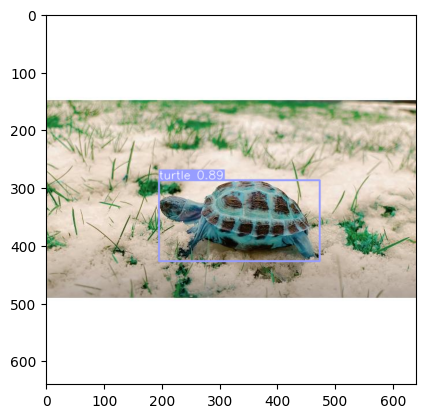

In [11]:
res = model.predict(test_path + '/image_id_067.jpg')[0].plot()
plt.imshow(res)
plt.show()